In [1]:
#librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#algoritmos
from sklearn.linear_model import LinearRegression #Regresion Lineal
from sklearn.linear_model import  LogisticRegression #Regresion logistica
from sklearn.tree import DecisionTreeClassifier #Arboles de decision
from sklearn.ensemble import RandomForestClassifier #Bosques aleatorios
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
datos_enfermedades_cardiacas = {
    'Enfermedad_Cardiaca': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'Edad': [45, 50, 46, 53, 47, 52, 48, 54, 49, 51],
    'Presion_Sanguinea': [130, 120, 140, 125, 135, 118, 138, 122, 133, 119],
    'Colesterol': [220, 180, 230, 190, 225, 175, 228, 185, 222, 180],
    'Fumador': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}



In [5]:
df = pd.DataFrame(datos_enfermedades_cardiacas)

In [7]:
df

,Enfermedad_Cardiaca,Edad,Presion_Sanguinea,Colesterol,Fumador
0,1,45,130,220,1
1,0,50,120,180,0
2,1,46,140,230,1
3,0,53,125,190,0
4,1,47,135,225,1
5,0,52,118,175,0
6,1,48,138,228,1
7,0,54,122,185,0
8,1,49,133,222,1
9,0,51,119,180,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Enfermedad_Cardiaca  10 non-null     int64
 1   Edad                 10 non-null     int64
 2   Presion_Sanguinea    10 non-null     int64
 3   Colesterol           10 non-null     int64
 4   Fumador              10 non-null     int64
dtypes: int64(5)
memory usage: 532.0 bytes


In [84]:
X= df[[ 'Colesterol', 'Edad', 'Presion_Sanguinea','Fumador']]
y= df['Enfermedad_Cardiaca']

In [86]:
X

,Colesterol,Edad,Presion_Sanguinea,Fumador
0,220,45,130,1
1,180,50,120,0
2,230,46,140,1
3,190,53,125,0
4,225,47,135,1
5,175,52,118,0
6,228,48,138,1
7,185,54,122,0
8,222,49,133,1
9,180,51,119,0


In [88]:
y

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    0
Name: Enfermedad_Cardiaca, dtype: int64

In [90]:
X_entrena ,X_prueba, y_entrena, y_prueba = train_test_split(X,y, train_size = 0.8, random_state=42)

In [92]:
modelo = LogisticRegression()

In [94]:
modelo.fit(X_entrena,y_entrena)

LogisticRegression()

In [96]:
modelo.score(X_entrena,y_entrena)

1.0

In [98]:
score_entrenamiento = modelo.score(X_entrena,y_entrena)

In [100]:
score_entrenamiento

1.0

In [102]:
score_prueba = modelo.score(X_prueba,y_prueba)

In [104]:
score_prueba

1.0

In [106]:
modelos = [('Regresion lineal:', LinearRegression()),
          ('Arboles de Decision:',DecisionTreeRegressor()),
          ('Bosques Aleatorios:', RandomForestRegressor()),
           ('Regresion Logistica:', LogisticRegression())
          ]

In [108]:
for nombre,  modelo in modelos:
    modelo.fit(X_entrena,y_entrena)
    puntaje = modelo.score(X_prueba,y_prueba)
    print(f"{nombre}: {puntaje:.4f}")

Regresion lineal:: 1.0000
Arboles de Decision:: 1.0000
Bosques Aleatorios:: 0.9950
Regresion Logistica:: 1.0000


In [116]:
datos_enfermedades_cardiacas_nuevos = { 
    "Colesterol": [230,120,200,150,100,135,190,65,10,20],
    "Edad": [45,30,31,32,25,35,56,41,53,16],
    "Presion_Sanguinea": [125, 135, 130, 140, 128, 138, 129, 137, 126, 134],
    "Fumador":[1,0,0,0,1,1,1,0,0,1]
}


In [118]:
datos_nuevos = pd.DataFrame(datos_enfermedades_cardiacas_nuevos)

In [120]:
probabilidad = modelo.predict(datos_nuevos)

In [126]:
probabilidad

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [136]:
probabilidad_cardiaca = probabilidad[1]

In [129]:
probabilidad_cardiaca

array([0.12243461, 0.99664015, 0.86546689, 0.99992689, 0.58152713,
       0.99966166, 0.74936945, 0.99927231, 0.23087666, 0.99279884])

''

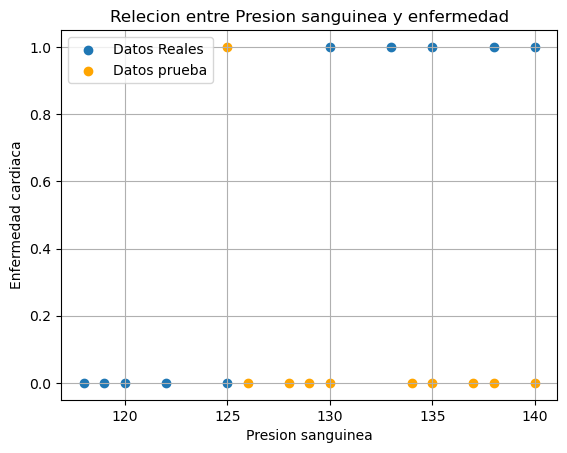

In [146]:
plt.scatter(df.Presion_Sanguinea, #grafico de dispercion
            df.Enfermedad_Cardiaca,label='Datos Reales')
plt.xlabel("Presion sanguinea")  # Nombre del eje X
plt.ylabel("Enfermedad cardiaca")  # Nombre del eje Y
plt.title("Relecion entre Presion sanguinea y enfermedad")
plt.scatter(datos_nuevos['Presion_Sanguinea'],
           probabilidad,
           color = 'orange', label='Datos prueba')
plt.legend()
plt.grid()
;

In [154]:
colesterol = float(input("Ingresa el valor de colesterol en sangre: "))
edad = int(input("Ingresa su edad: "))
presion = int(input("Ingresa su presion sanguinea: "))
fumador = bool(input("Ingresa si es fumador Si o No: "))

probabilidad_cardiaca = modelo.predict([[colesterol,edad,presion,fumador]])
print(f'proprobabilidad_cardiaca: {"Tiene enfermedad cardíaca" if probabilidad_cardiaca[0] == 1 else "No tiene enfermedad cardíaca"}')


Ingresa el valor de colesterol en sangre:  153
Ingresa su edad:  32
Ingresa su presion sanguinea:  200
Ingresa si es fumador Si o No:  Si


proprobabilidad_cardiaca: No tiene enfermedad cardíaca


C:\Users\beneg\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
